### Edgar Moises Hernandez-Gonzalez
#### 01/04/20-02/04/20
#### Clasificacion de CIFAR10 con Fine Tunning con data augmentation usando VGG16
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 72.54%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [0]:
datagen_train = ImageDataGenerator(
	rotation_range=20,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True)

In [10]:
base_model = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=x_train.shape[1:])

58892288/58889256 [==============================] - 2s 0us/step


In [11]:
for layer in base_model.layers[:-4]:
  layer.trainable = False

for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f1573354a20> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15733547b8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1573390a90> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f157230e438> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15722b50b8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15722c2128> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f15722c95c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15722c9438> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f15722d4780> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1560209940> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f1560210860> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [0]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

optimizer = Adam(lr=1e-6)
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 7,112,906
Non-trainable params: 7,635,264
_________________________________________________________________


In [20]:
history = model.fit_generator(datagen_train.flow(x_train, y_train_categorical, batch_size=128),
                              steps_per_epoch=np.ceil(n_samples_train/128),
                              epochs=200,
                              validation_data=(x_test, y_test_categorical),
                              verbose=2)
# no se usa porque validation_data no es un generador
#validation_steps=np.ceil(n_samples_test/128)

Epoch 1/200
391/391 - 31s - loss: 2.3655 - accuracy: 0.1368 - val_loss: 2.1834 - val_accuracy: 0.2209
Epoch 2/200
391/391 - 31s - loss: 2.1186 - accuracy: 0.2492 - val_loss: 1.9371 - val_accuracy: 0.3751
Epoch 3/200
391/391 - 31s - loss: 1.9235 - accuracy: 0.3300 - val_loss: 1.7194 - val_accuracy: 0.4491
Epoch 4/200
391/391 - 30s - loss: 1.7964 - accuracy: 0.3729 - val_loss: 1.5942 - val_accuracy: 0.4822
Epoch 5/200
391/391 - 30s - loss: 1.7119 - accuracy: 0.4049 - val_loss: 1.5090 - val_accuracy: 0.5086
Epoch 6/200
391/391 - 30s - loss: 1.6572 - accuracy: 0.4233 - val_loss: 1.4512 - val_accuracy: 0.5218
Epoch 7/200
391/391 - 30s - loss: 1.6073 - accuracy: 0.4452 - val_loss: 1.4051 - val_accuracy: 0.5355
Epoch 8/200
391/391 - 31s - loss: 1.5643 - accuracy: 0.4601 - val_loss: 1.3623 - val_accuracy: 0.5502
Epoch 9/200
391/391 - 31s - loss: 1.5308 - accuracy: 0.4709 - val_loss: 1.3164 - val_accuracy: 0.5596
Epoch 10/200
391/391 - 30s - loss: 1.4898 - accuracy: 0.4848 - val_loss: 1.2858 - 

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 2s - loss: 0.7932 - accuracy: 0.7254
Test loss: 0.7932395339012146
Test accuracy: 0.7253999710083008


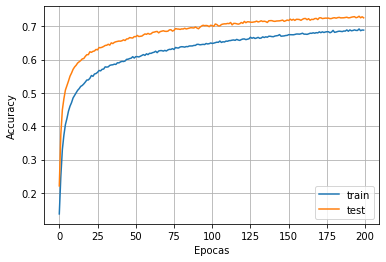

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

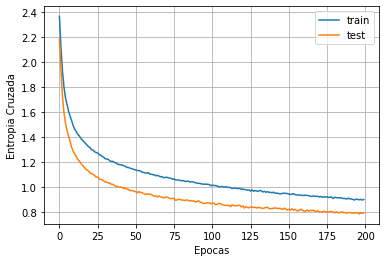

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [25]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[814  29  26   5   8   3  14  18  47  36]
 [ 13 852   0   5   1   3  13   2  10 101]
 [ 50  18 601  28  74  35 140  38   4  12]
 [ 16  28  44 457  29 147 176  52  16  35]
 [ 28   8  50  23 595  27 157  91   8  13]
 [ 13   9  36 139  32 594  85  69   5  18]
 [  6   7  25  20  21  20 873   8   8  12]
 [ 11   3  13  20  31  34  26 839   4  19]
 [ 61  42  10   7   6   2   5   6 818  43]
 [ 21  96   3   8   3   4  18  17  19 811]]


In [26]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.78      0.85      0.81      1000
           2       0.74      0.60      0.66      1000
           3       0.64      0.46      0.53      1000
           4       0.74      0.59      0.66      1000
           5       0.68      0.59      0.64      1000
           6       0.58      0.87      0.70      1000
           7       0.74      0.84      0.78      1000
           8       0.87      0.82      0.84      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000

